**Data Transformation Notebook**

<div style="font-family: system-ui; padding: 20px 30px 20px 20px; background-color: #FFFFFF; border-left: 8px solid #ED9255; border-radius: 8px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);max-width:600px;color:#212121;">

- 📅 Date: 19 November 2025
- 👤 Name: Lethokuhle Sikosana
- 🎯 Purpose: Conduct Statistical Analysis on SAPS Crime Data from 2008 - 2013 

<span style="display:block;line-height:1.15em;color:#666666;font-size:0.9em;">
</span>

</div>

## Imports

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading the Data

In [7]:
rustenburg_municipality_df = pd.read_csv('data/rustenburg_municipality_crime_data.csv')
#Check if converted to DataFrame correctly
rustenburg_municipality_df.head(5)

,year,station,total_crime,contact_related_crime,crimes_against_property,other_serious_crimes,contact_crime,crimes_dependent_on_police_action_for_detention,total_crime_excl_police,crimes_against_property_log,contact_crime_log,contact_related_crime_log,other_serious_crimes_log,crimes_dependent_on_police_action_for_detention_log,total_crime_log,total_crime_excl_police_log,treated,year_numeric,post,did
0,2008/2009,bethanie,1129,82,249,265,550,65,1064,5.521461,6.311735,4.418841,5.583496,4.189655,7.029973,6.970730,0,2008,0,0
1,2008/2009,boitekong,1666,98,411,149,741,365,1301,6.021023,6.609349,4.595120,5.010635,5.902633,7.418781,7.171657,0,2008,0,0
2,2008/2009,boons,244,15,88,81,60,15,229,4.488636,4.110874,2.772589,4.406719,2.772589,5.501258,5.438079,0,2008,0,0
3,2008/2009,lethabong,573,34,131,68,227,147,426,4.882802,5.429346,3.555348,4.234107,4.997212,6.352629,6.056784,0,2008,0,0
4,2008/2009,marikana,1640,119,354,451,657,178,1462,5.872118,6.489205,4.787492,6.113682,5.187386,7.403061,7.288244,1,2008,0,0


## Transformations Needed for Visualisation

In [8]:
# Map treated values to readable legend labels
rustenburg_municipality_df['group_label'] = rustenburg_municipality_df['treated'].map({
    1: 'Marikana',
    0: 'Control Group (Rustenburg Municipal Towns)'
})

## Visualisation

### Chart for Crime Dependent on Police Action (Police Model)

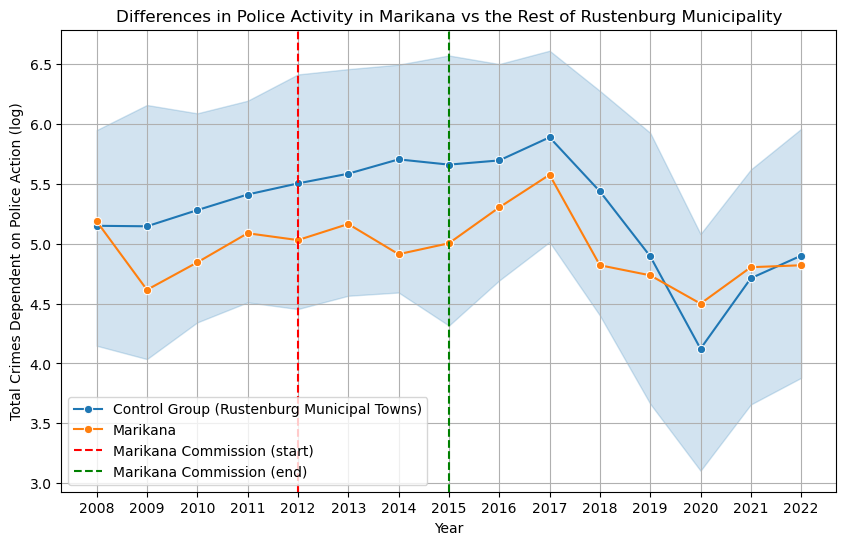

In [9]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_1 = sns.lineplot(
    data=rustenburg_municipality_df,
    x='year_numeric',
    y='crimes_dependent_on_police_action_for_detention_log',
    hue='group_label',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Dependent on Police Action (log)')
plt.title('Differences in Police Activity in Marikana vs the Rest of Rustenburg Municipality')
plt.legend()
plt.xticks(rustenburg_municipality_df['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/police_model.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Chart for Total Crime as the Outcome Variable (Citizen Model)

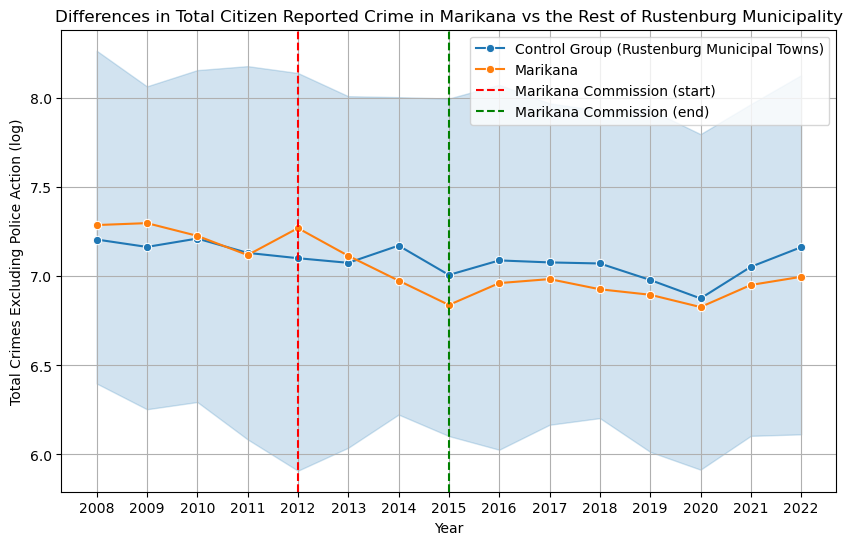

In [10]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_3 = sns.lineplot(
    data=rustenburg_municipality_df,
    x='year_numeric',
    y='total_crime_excl_police_log',
    hue='group_label',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Excluding Police Action (log)')
plt.title('Differences in Total Citizen Reported Crime in Marikana vs the Rest of Rustenburg Municipality')
plt.legend()
plt.xticks(rustenburg_municipality_df['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/citizen_model.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()